<I><h1>The First Quiz of Artificial Neural Network</h1></I>
<I><h2>Name: Ata Shaker</h2></I>
<I><h2>Std No.: 040200925</h2></I>

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.svm import SVC

In [2]:
data = loadmat('ExampleDataSVM2.mat') # Loading the data
x = data['X']
y = data['y']

gamma_C_values = [(0.01, 1), (1, 1), (10, 1), (100, 1), (0.1, 1), (0.1, 10), (0.1, 100),(0.1, 1000), (0.1, 10000)] # Values mentioned in the quiz

positive_filter = (y == 1).reshape(x.shape[0],1)[:, 0] # Creating a filter for positive values
negative_filter = (y == 0).reshape(x.shape[0],1)[:, 0] # Creating a filter for negative values

x_new = np.linspace(x[:,0].min(), x[:,0].max(), num=100)
y_new = np.linspace(x[:,1].min(), x[:,1].max(), num=100)

grid_x, grid_y = np.meshgrid(x_new, y_new) # Creating a grid

C:\Users\ata79\AppData\Local\Temp/ipykernel_18332/487045436.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(grid_x, grid_y, classifier.predict(np.array([grid_x.ravel(), grid_y.ravel()]).T).reshape(grid_x.shape), 1, colors = 'g') # plotting the counter
C:\Users\ata79\AppData\Local\Temp/ipykernel_18332/487045436.py:13: UserWarning: No contour levels were found within the data range.
  plt.contour(grid_x, grid_y, classifier.predict(np.array([grid_x.ravel(), grid_y.ravel()]).T).reshape(grid_x.shape), 1, colors = 'g') # plotting the counter


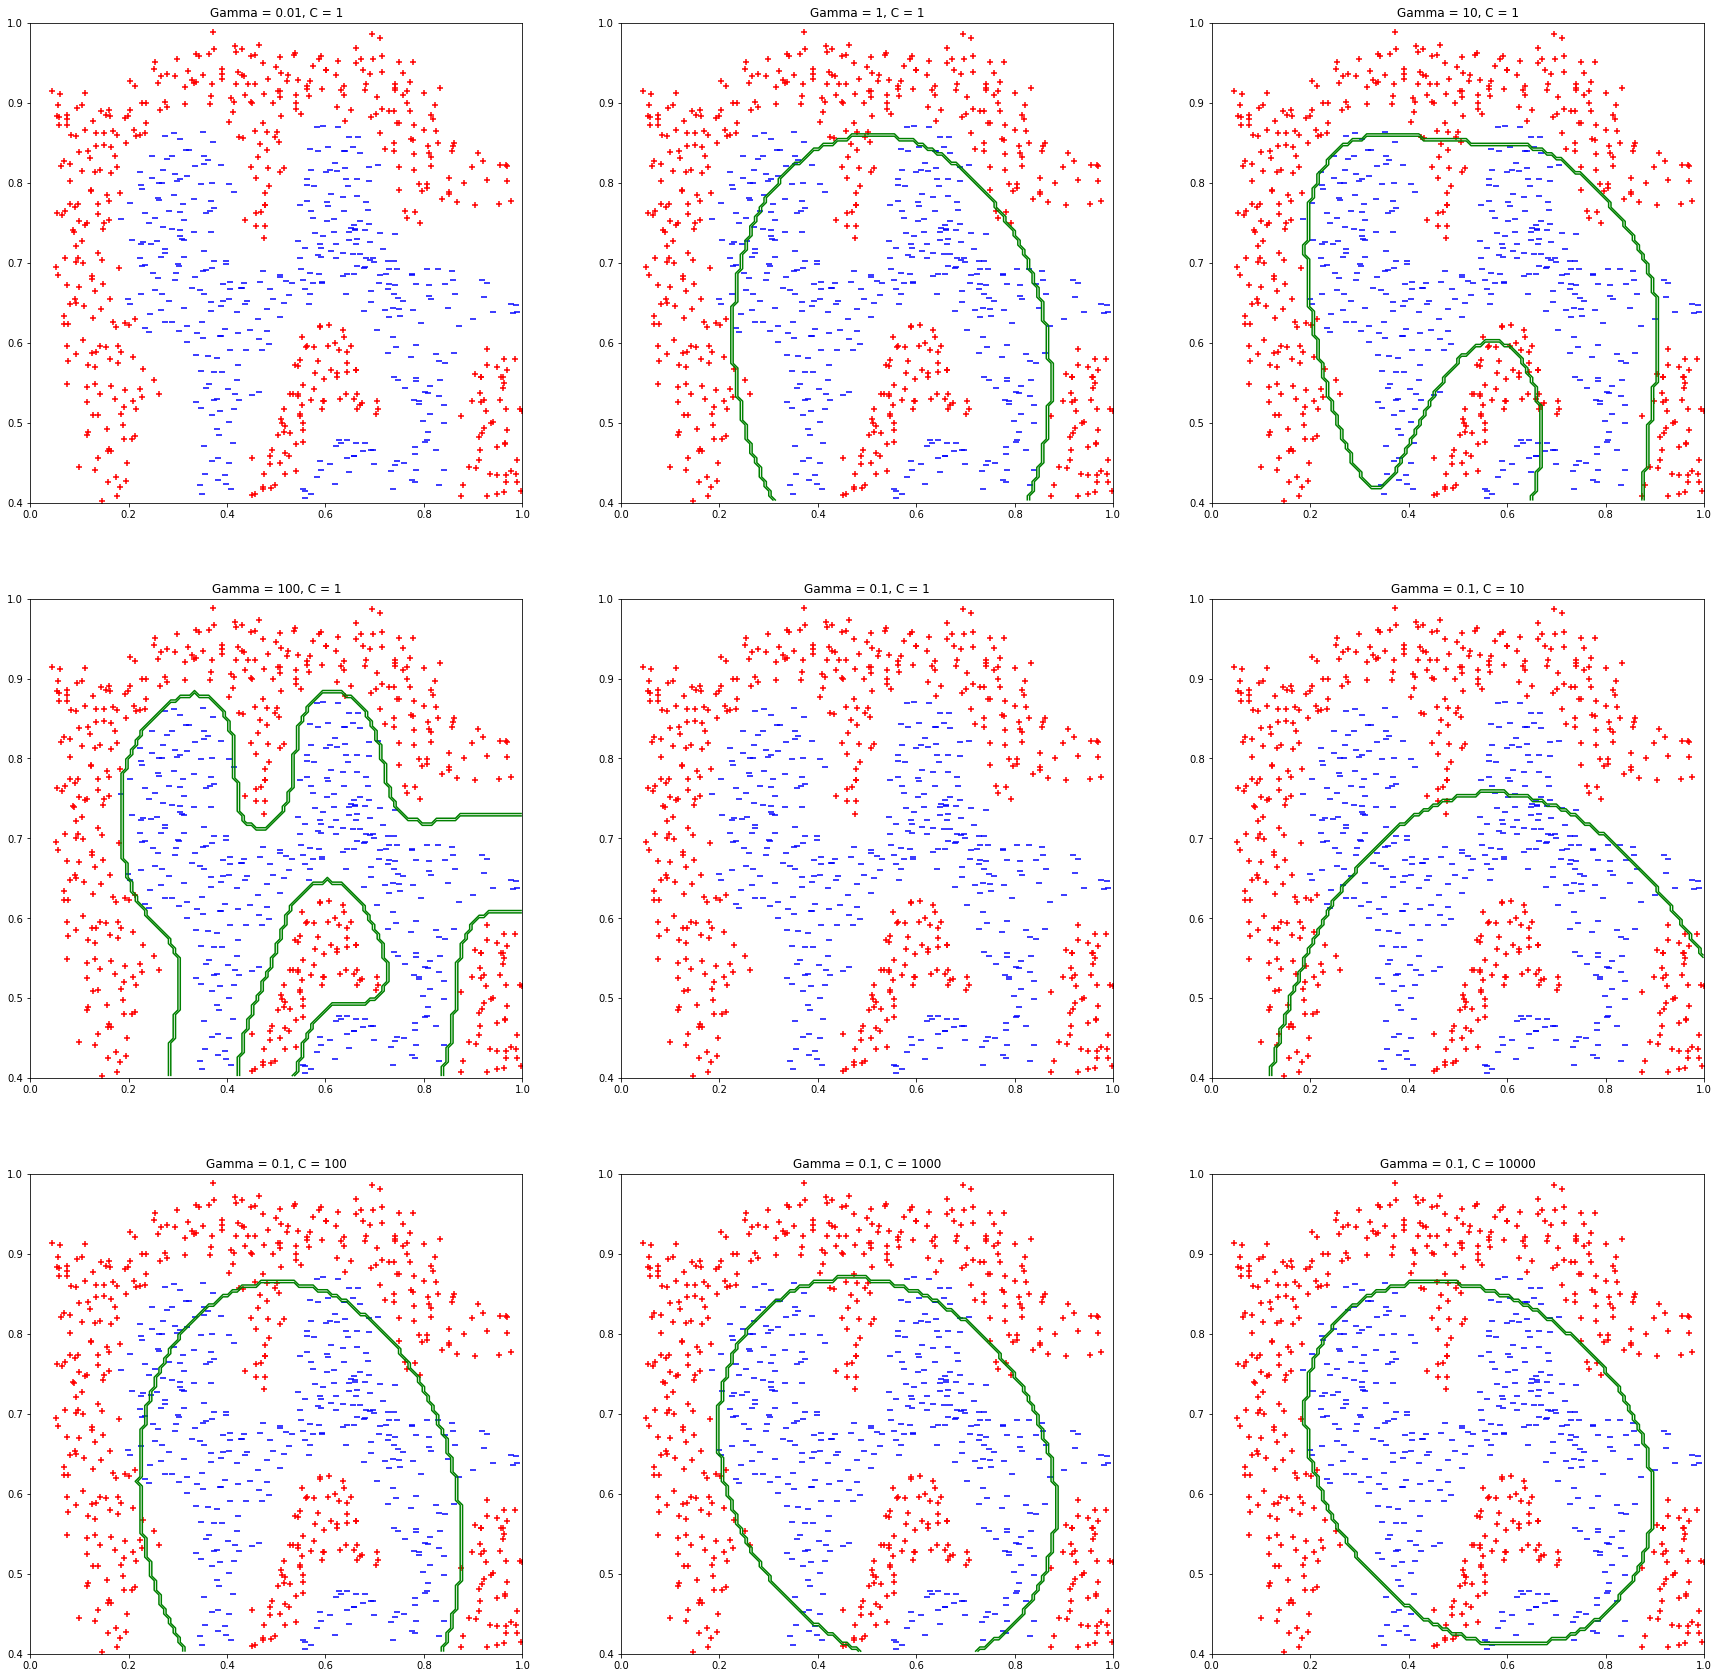

In [3]:

plt.figure(figsize= (30, 30)) # Creating a figure with 30*30 inches 

for index, tupl in enumerate(gamma_C_values):
    dummy_gamma = tupl[0] # updating gamma
    dummy_C = tupl[1] # updating C

    classifier = SVC(C = dummy_C, kernel = "rbf", gamma = dummy_gamma)
    classifier.fit(x, y.ravel())

    plt.subplot(3, 3, index + 1)
    plt.scatter(x[negative_filter, 0], x[negative_filter, 1], c = 'b' , marker = '_') # plotting the negative points
    plt.scatter(x[positive_filter, 0], x[positive_filter, 1], c = 'r' , marker = '+') # plotting the negative points
    plt.contour(grid_x, grid_y, classifier.predict(np.array([grid_x.ravel(), grid_y.ravel()]).T).reshape(grid_x.shape), 1, colors = 'g') # plotting the counter
    plt.title(f'Gamma = {dummy_gamma}, C = {dummy_C}') # title of the figure
    plt.xlim(0, 1)
    plt.ylim(0.4, 1)